In [1]:
import matplotlib.pyplot as plt
import matplotlib.image as mpimg
import matplotlib as mpl
import numpy as np
import scipy.signal
import svgwrite
import IPython

#%matplotlib notebook
%matplotlib inline
mpl.rcParams['figure.figsize'] = (18, 6)


In [2]:

dwg = svgwrite.Drawing('test.svg', profile='tiny')
dwg.add(dwg.line((0, 0), (10, 10), stroke=svgwrite.rgb(10, 10, 16, '%')))
dwg.add(dwg.text('Test', insert=(0.2, 10.2), fill='red'))
dwg.save()
IPython.display.SVG('test.svg')



In [3]:
import os, glob, sys

files = glob.glob('csv/c*.csv')
# make sure we get a consistent order.
files.sort()
data = []
for name in files: 
    try:
        print " reading  file " + name
        thisfile = np.loadtxt(name, skiprows=1, usecols=tuple((0,1,2,3,4)),delimiter=",")
        thisfile = scipy.signal.decimate(thisfile, 10, n=None, ftype='iir', axis=0, zero_phase=True)
        data.append(thisfile)
    except IOError as exc:
        if exc.errno != errno.EISDIR:
            pass
        else: # Do not fail if a directory is found, just ignore it.
            raise exc # Propagate other kinds of IOError.
#c = np.loadtxt("c18-06-24-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#c = np.loadtxt("c18-07-01-12_00.csv",skiprows=1,usecols=(0,1,2,3,4),delimiter=",")
#print(c.shape)
print "done"

 reading  file csv\c18-06-22-12_00.csv


C:\Users\foote\Anaconda2\lib\site-packages\scipy\signal\_arraytools.py:45: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  b = a[a_slice]
C:\Users\foote\Anaconda2\lib\site-packages\scipy\signal\signaltools.py:3463: FutureWarning: Using a non-tuple sequence for multidimensional indexing is deprecated; use `arr[tuple(seq)]` instead of `arr[seq]`. In the future this will be interpreted as an array index, `arr[np.array(seq)]`, which will result either in an error or a different result.
  return y[sl]


 reading  file csv\c18-06-23-12_00.csv
 reading  file csv\c18-06-24-12_00.csv
 reading  file csv\c18-06-25-12_00.csv
 reading  file csv\c18-06-26-12_00.csv
 reading  file csv\c18-06-27-12_00.csv
 reading  file csv\c18-06-28-12_00.csv
 reading  file csv\c18-06-29-12_00.csv
 reading  file csv\c18-06-30-12_00.csv
 reading  file csv\c18-07-01-12_00.csv
 reading  file csv\c18-07-02-12_00.csv
 reading  file csv\c18-07-03-12_00.csv
 reading  file csv\c18-07-04-12_00.csv
 reading  file csv\c18-07-05-12_00.csv
 reading  file csv\c18-07-06-12_00.csv
 reading  file csv\c18-07-07-12_00.csv
 reading  file csv\c18-07-08-12_00.csv
 reading  file csv\c18-07-09-12_00.csv
 reading  file csv\c18-07-10-12_00.csv
 reading  file csv\c18-07-11-12_00.csv
 reading  file csv\c18-07-12-12_00.csv
 reading  file csv\c18-07-13-12_00.csv
 reading  file csv\c18-07-14-12_00.csv
 reading  file csv\c18-07-15-12_00.csv
 reading  file csv\c18-07-16-12_00.csv
 reading  file csv\c18-07-17-12_00.csv
 reading  file csv\c18-07

In [5]:
# massage data and plot

day = 7420 # this many indexes in a day, roughly
hour = int(float(day)/24.) # chop this off to correct for dst
newd = []
d = data[0]
oldt = d[0,0]
dst = True
for i, d in enumerate(data[:]):
    if d.shape[0] > 7420:
        print d.shape
        t = d[0,0]
        print(t -oldt)
        if (t - oldt) > 88000 and (t - oldt < 90000):
            dst = False
        if dst:
            # add in an hour to time 
            newd.append(d[hour:7420,:])
            print("DST")
        else:
            newd.append(d[0:7420-hour,:])
        oldt = t
            
        #del data
#print newd[0]
                    

(7429L, 5L)
0.0
DST
(7428L, 5L)
85400.5371696949
DST
(7429L, 5L)
85418.2073469162
DST
(7428L, 5L)
85414.85457324982
DST
(7428L, 5L)
85405.48204135895
DST
(7429L, 5L)
85416.13233852386
DST
(7428L, 5L)
85402.60904598236
DST
(7428L, 5L)
85410.20818066597
DST
(7429L, 5L)
85421.52845478058
DST
(7429L, 5L)
85399.5645647049
DST
(7429L, 5L)
170839.68719673157
DST
(7429L, 5L)
85395.65706181526
DST
(7428L, 5L)
85405.18755626678
DST
(7429L, 5L)
85428.35039806366
DST
(7429L, 5L)
85398.70122623444
DST
(7429L, 5L)
85415.22147083282
DST
(7429L, 5L)
85416.46578884125
DST
(7429L, 5L)
85416.86077237129
DST
(7429L, 5L)
85400.23373889923
DST
(7429L, 5L)
85410.0626783371
DST
(7429L, 5L)
85421.24379634857
DST
(7429L, 5L)
85407.31563282013
DST
(7429L, 5L)
85405.79786229134
DST
(7429L, 5L)
85420.5036020279
DST
(7429L, 5L)
85403.76998233795
DST
(7429L, 5L)
85411.01527309418
DST
(7429L, 5L)
85413.29450893402
DST
(7429L, 5L)
85407.22319889069
DST
(7428L, 5L)
85414.63500523567
DST
(7429L, 5L)
85404.84235668182
DS

(7111L,)
[[3.38935596e-05 3.38236266e-05 3.38316990e-05]
 [3.35569856e-05 3.38458295e-05 3.38394207e-05]
 [3.43168714e-05 3.38252004e-05 3.38289087e-05]
 ...
 [3.38339250e-05 3.38343798e-05 3.38343799e-05]
 [3.38349350e-05 3.38343798e-05 3.38343798e-05]
 [3.38338907e-05 3.38343798e-05 3.38343798e-05]]


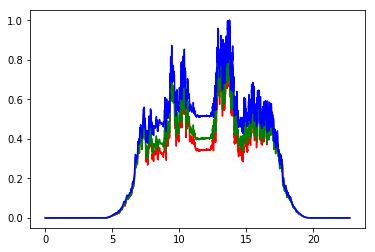

In [34]:
c = newd[2]
time = c[:,0]
time = (time - time[0])/3600

cmean = np.mean(c[:,1:4],axis=1)
print cmean.shape

#plt.plot(time,c[:,1] -cmean,'r')
#plt.plot(time,c[:,2] - cmean ,'g')
#plt.plot(time,c[:,3]- cmean,'b')

#plt.plot(time,cmean,'k')
#plt.savefig("graph.png")

normc = c[:,1:4]/np.max(c[:,1:4])
plt.plot(time,normc[:,0],'r')
plt.plot(time,normc[:,1],'g')
plt.plot(time,normc[:,2],'b')

print normc

In [35]:

dwg = svgwrite.Drawing('lines.svg', size=(2000,2000), profile='tiny')
lineheight = 10
thisy = lineheight
oldy = thisy
for d in newd[1:300]:
    amp = scipy.signal.decimate(d[:,1], 15, n=None, ftype='iir', axis=0, zero_phase=True)
    oldx = 0
    for a in amp:
        newx = oldx + 2
        newy = thisy - a/2000.
        dwg.add(dwg.line((oldx, oldy), (newx, newy), stroke=svgwrite.rgb(10, 10, 16, '%')))
        oldx = newx
        oldy = newy
        
    thisy = thisy + lineheight
    #dwg.add(dwg.text('Test', insert=(0.2, 10.2), fill='red'))
dwg.save()
IPython.display.SVG('lines.svg')


In [36]:

dwg = svgwrite.Drawing('filledlines.svg', size=(2000,2000), profile='tiny')
lineheight = 10

colors = ['cyan','magenta','yellow']
rgbcolors = ['red','green','blue']
colors = ['white','white','white']
for c in range(3):
    thisy = lineheight
    for d in newd[1:300]:
        amp = scipy.signal.decimate(d[:,c+1], 15, n=None, ftype='iir', axis=0, zero_phase=True)
        oldx =0
        thisline = dwg.polyline([(0,thisy)])
        thisline.fill(colors[c], opacity=1.0).stroke(rgbcolors[c], width=1)
        for a in amp:
            newx = oldx + 2
            newy = thisy - a/2000.
            thisline.points.append((newx,newy))
            oldx = newx
        dwg.add(thisline)
        thisy = thisy + lineheight
    #dwg.add(dwg.text('Test', insert=(0.2, 10.2), fill='red'))
dwg.save()
IPython.display.SVG('filledlines.svg')


In [15]:
# spiral plots
from PIL import Image, ImageDraw
im = Image.new('RGBA', (400, 400), (0, 255, 0, 0)) 
draw = ImageDraw.Draw(im) 
draw.line((100,200, 150,300), fill=128)
im.show()

def getcolor(cmap, frac):
    """ go fraction into cmap and return a color triple """
    l, w = cmap.shape
    assert(w ==3)
    i = int(l*frac)
    if i >= l:
        i = l-1
    if i < 0:
        i = 0
    return cmap[i,:]
    


In [14]:
img.save('radialdays.png')

NameError: name 'img' is not defined

In [ ]:
def get_colors_for(c):
    red = c[:,1]
    grn = c[:,2]
    blu = c[:,3]

    mmax = np.max([np.max(red), np.max(blu), np.max(grn)])

    red = red/mmax
    grn = grn/mmax
    blu = blu/mmax


    colors = []
    for i, r in enumerate(red):
        colors.append(mpl.colors.to_rgb((red[i],grn[i],blu[i])))
    return colors

c = get_colors_for(newdata[0])


In [10]:
newd = np.array(newd)
print newd.shape

(10L, 74199L, 5L)


(7419L, 5L)
(7419L, 3L)


ValueError: zero-size array to reduction operation minimum which has no identity

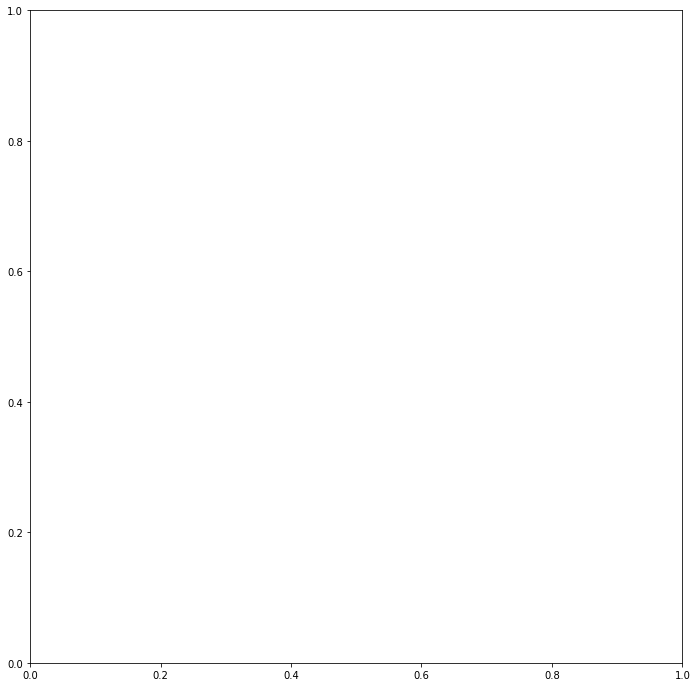

In [87]:
# make rectangular jpeg to wrap a sphere
import scipy.signal
from PIL import Image, ImageDraw

cmap = []
for d in newd[3:4]:
    print d.shape
    colors = d[:,1:4]
    # gamma correct
    colors = (colors / 65535.)**(1/2.2)
    colors = colors/np.max(colors)
    #colors = colors/mmax
    
    print colors.shape
    dcol =  scipy.signal.decimate(colors, 10, n=None, ftype='iir', axis=0, zero_phase=True)
    dcol_wide = np.multiply.outer(np.ones((1000)),dcol)
    cmap.extend(dcol_wide)
    
#dcol_wide = np.multiply.outer(np.ones((500)),dcol)
#dcol_wide = np.swapaxes(dcol_wide,1,2)
cmap = np.swapaxes(cmap,0,1)
cmap = np.array(cmap,dtype=float)
#print days.shape

#daysn = days/np.max(days)

#plt.imshow(cmap[1500:7500,:])
fig = plt.figure(frameon=False, figsize = (12,12))
plt.imshow(cmap[1500:7500,:])
plt.axis('off')  
fig.axes[0].get_xaxis().set_visible(False)
fig.axes[0].get_yaxis().set_visible(False)
plt.savefig('cmap.jpg',bbox_inches='tight', pad_inches=0)

In [ ]:
   fig = plt.figure(frameon=False, figsize = (12,12))
    plt.imshow(out)
    plt.axis('off')  
    fig.axes[0].get_xaxis().set_visible(False)
    fig.axes[0].get_yaxis().set_visible(False)
    plt.savefig('advance{:03d}.png'.format(i),bbox_inches='tight', pad_inches=0)